# Import libraries

In [ ]:
import os
import requests
import json
import os

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## login into Openshift

In [ ]:
username = os.environ['USERNAME']
password = os.environ['PASSWORD']

!oc login -u $username -p $password --insecure-skip-tls-verify https://api.cnv.massopen.cloud:6443

In [11]:
!oc project

Using project "thoth-deployment-examples" on server "https://api.cnv.massopen.cloud:6443".


In [2]:
!oc project thoth-deployment-examples

Now using project "thoth-deployment-examples" on server "https://api.cnv.massopen.cloud:6443".


In [12]:
!oc get pods

NAME                                  READY     STATUS      RESTARTS   AGE
elyra-aidevsecops-tutorial-2-deploy   0/1       Completed   0          12d
elyra-aidevsecops-tutorial-2-wmml6    1/1       Running     0          12d


In [4]:
!oc get routes

NAME                         HOST/PORT                                                                      PATH      SERVICES                     PORT      TERMINATION   WILDCARD
elyra-aidevsecops-tutorial   elyra-aidevsecops-tutorial-thoth-deployment-examples.apps.cnv.massopen.cloud             elyra-aidevsecops-tutorial   <all>                   None


## Test deployed Model

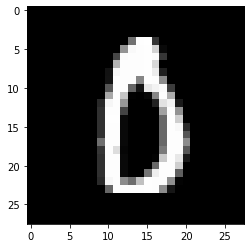

The number in the image is 0 with probability 1.0


In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_test = np.array(x_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].
x_test = x_test / 255.0

addr = os.getenv("THOTH_AIDEVSECOPS_TUTORIAL_MODEL_URL", "http://elyra-aidevsecops-tutorial-thoth-deployment-examples.apps.cnv.massopen.cloud")
test_url = addr + "/predict"

# prepare headers for http request
headers = {"content-type": "application/json"}

# select one test image
img = x_test[5890]
data = json.dumps({"inputs": img.tolist()})

# Check which image is sent
plt.imshow(img, cmap="gray")
plt.show(block=False)
plt.pause(1)
plt.close()

# send http request with image and receive response
response = requests.post(test_url, data=data, headers=headers)

# decode response
print(response.json()['response'])